## Pakistan's Largest E-Commerce Dataset - EDA

### Contexto

Esse é o maior dataset público com dados de pedidos realizados em um e-commerce paquistanês, contendo mais de meio milhão de entradas. A base contém dados desde Março de 2016 até Agosto de 2018. Esse dataset foi disponibilizado no Kaggle e foi coletado como parte de um estudo de pesquisa. 
<br>

### Meus objetivos

* Descobrir mais sobre o dataset, visto que a quantidade de informações no Kaggle sobre ele é baixa
* Criar um dicionário das variáveis
* Limpar o dataset caso necessário
* Resolver algumas tasks e responder perguntas sobre o dataset

### Tasks e perguntas a serem respondidas

#### Categorias
* Qual a categoria de produtos mais vendida do E-commerce?
* Existe uma relação entre a categoria e a época do ano?

#### Sazonalidade
* Existe uma relação entre o número de pedidos e a época do ano?
    * Se essa relação existir, podemos identificar algum tipo de aumento no número/valor dos descontos que induza o aumento dos pedidos?
* Qual o mês que o e-commerce tem maior receita? Qual o dia da semana?

#### Categorização do pedido
* Qual é o valor gasto em média por pedido? 
* Quantos items ele normalmente tem?
* Pedidos com desconto têm maior chance de não serem cancelados?

#### Forma de pagamento
* Qual é a forma de pagamento mais comum?
* Existe uma relação entre a forma de pagamento e o status do pedido?

#### Análise Financeira
* Qual a tendência do número de vendas? E do valor delas?
* Visualização da receita do e-commerce.
* Quanto a empresa faturou até o momento (desde o início do dataset)?
* Dá pra prever com confiança o número de pedidos/valores de venda para os próximos meses?

### Importação das Libs e do arquivo

In [1]:
# NumPy, Pandas & Visualização de Dados

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

# Removendo notação científica de valores altos
pd.options.display.float_format = '{:.2f}'.format

# Opções do SNS
sns.set_style("white")

In [2]:
raw_df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv",
                     parse_dates=["created_at", "Working Date", "M-Y", "Customer Since"], low_memory=False)

In [3]:
pd.set_option("display.max_columns", None)
raw_df.head(10)

item_id          status created_at  \
0 211131.00        complete 2016-07-01   
1 211133.00        canceled 2016-07-01   
2 211134.00        canceled 2016-07-01   
3 211135.00        complete 2016-07-01   
4 211136.00  order_refunded 2016-07-01   
5 211137.00        canceled 2016-07-01   
6 211138.00        complete 2016-07-01   
7 211139.00        complete 2016-07-01   
8 211140.00        canceled 2016-07-01   
9 211141.00        canceled 2016-07-01   

                                                 sku    price  qty_ordered  \
0                                  kreations_YI 06-L  1950.00         1.00   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.00         1.00   
2                                 Ego_UP0017-999-MR0  2450.00         1.00   
3                                     kcc_krone deal   360.00         1.00   
4                                        BK7010400AG   555.00         2.00   
5                      UK_Namkino All In One 200 Gms    80.00         1.00   
6                                     kcc_krone deal   360.00         1.00   
7                       UK_Namkino Mix Nimco 400 Gms   170.00         1.00   
8                               Apple iPhone 6S 64GB 96499.00         1.00   
9                               Apple iPhone 6S 64GB 96499.00         1.00   

   grand_total increment_id    category_name_1 sales_commission_code  \
0      1950.00    100147443    Women's Fashion                    \N   
1       240.00    100147444  Beauty & Grooming                    \N   
2      2450.00    100147445    Women's Fashion                    \N   
3        60.00    100147446  Beauty & Grooming           R-FSD-52352   
4      1110.00    100147447            Soghaat                    \N   
5        80.00    100147448            Soghaat                    \N   
6        60.00    100147449  Beauty & Grooming                    \N   
7       170.00    100147450            Soghaat                    \N   
8     96499.00    100147451  Mobiles & Tablets                    \N   
9     96499.00    100147452  Mobiles & Tablets                    \N   

   discount_amount payment_method Working Date BI Status       MV     Year  \
0             0.00            cod   2016-07-01     #REF!    1,950  2016.00   
1             0.00            cod   2016-07-01     Gross      240  2016.00   
2             0.00            cod   2016-07-01     Gross    2,450  2016.00   
3           300.00            cod   2016-07-01       Net      360  2016.00   
4             0.00            cod   2016-07-01     Valid    1,110  2016.00   
5             0.00            cod   2016-07-01     Gross       80  2016.00   
6           300.00            cod   2016-07-01       Net      360  2016.00   
7             0.00            cod   2016-07-01       Net      170  2016.00   
8             0.00  ublcreditcard   2016-07-01     Gross   96,499  2016.00   
9             0.00      mygateway   2016-07-01     Gross   96,499  2016.00   

   Month Customer Since        M-Y    FY  Customer ID  Unnamed: 21  \
0   7.00     2016-07-01 2016-07-01  FY17         1.00          nan   
1   7.00     2016-07-01 2016-07-01  FY17         2.00          nan   
2   7.00     2016-07-01 2016-07-01  FY17         3.00          nan   
3   7.00     2016-07-01 2016-07-01  FY17         4.00          nan   
4   7.00     2016-07-01 2016-07-01  FY17         5.00          nan   
5   7.00     2016-07-01 2016-07-01  FY17         6.00          nan   
6   7.00     2016-07-01 2016-07-01  FY17         7.00          nan   
7   7.00     2016-07-01 2016-07-01  FY17         6.00          nan   
8   7.00     2016-07-01 2016-07-01  FY17         8.00          nan   
9   7.00     2016-07-01 2016-07-01  FY17         8.00          nan   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          nan          nan          nan          nan  
1          nan          nan          nan          nan  
2          nan          nan          nan          nan  
3          nan          nan        

In [4]:
raw_df.tail(10)

item_id status created_at  sku  price  qty_ordered  grand_total  \
1048565      nan    NaN        NaT  NaN    nan          nan          nan   
1048566      nan    NaN        NaT  NaN    nan          nan          nan   
1048567      nan    NaN        NaT  NaN    nan          nan          nan   
1048568      nan    NaN        NaT  NaN    nan          nan          nan   
1048569      nan    NaN        NaT  NaN    nan          nan          nan   
1048570      nan    NaN        NaT  NaN    nan          nan          nan   
1048571      nan    NaN        NaT  NaN    nan          nan          nan   
1048572      nan    NaN        NaT  NaN    nan          nan          nan   
1048573      nan    NaN        NaT  NaN    nan          nan          nan   
1048574      nan    NaN        NaT  NaN    nan          nan          nan   

        increment_id category_name_1 sales_commission_code  discount_amount  \
1048565          NaN             NaN                   NaN              nan   
1048566          NaN             NaN                   NaN              nan   
1048567          NaN             NaN                   NaN              nan   
1048568          NaN             NaN                   NaN              nan   
1048569          NaN             NaN                   NaN              nan   
1048570          NaN             NaN                   NaN              nan   
1048571          NaN             NaN                   NaN              nan   
1048572          NaN             NaN                   NaN              nan   
1048573          NaN             NaN                   NaN              nan   
1048574          NaN             NaN                   NaN              nan   

        payment_method Working Date BI Status  MV   Year  Month  \
1048565            NaN          NaT       NaN  NaN   nan    nan   
1048566            NaN          NaT       NaN  NaN   nan    nan   
1048567            NaN          NaT       NaN  NaN   nan    nan   
1048568            NaN          NaT       NaN  NaN   nan    nan   
1048569            NaN          NaT       NaN  NaN   nan    nan   
1048570            NaN          NaT       NaN  NaN   nan    nan   
1048571            NaN          NaT       NaN  NaN   nan    nan   
1048572            NaN          NaT       NaN  NaN   nan    nan   
1048573            NaN          NaT       NaN  NaN   nan    nan   
1048574            NaN          NaT       NaN  NaN   nan    nan   

        Customer Since M-Y   FY  Customer ID  Unnamed: 21  Unnamed: 22  \
1048565            NaT NaT  NaN          nan          nan          nan   
1048566            NaT NaT  NaN          nan          nan          nan   
1048567            NaT NaT  NaN          nan          nan          nan   
1048568            NaT NaT  NaN          nan          nan          nan   
1048569            NaT NaT  NaN          nan          nan          nan   
1048570            NaT NaT  NaN          nan          nan          nan   
1048571            NaT NaT  NaN          nan          nan          nan   
1048572            NaT NaT  NaN          nan          nan          nan   
1048573            NaT NaT  NaN          nan          nan          nan   
1048574            NaT NaT  NaN          nan          nan          nan   

         Unnamed: 23  Unnamed: 24  Unnamed: 25  
1048565          nan          nan          nan  
1048566          nan          nan          nan  
1048567          nan          nan          nan  
1048568          nan          nan          nan  
1048569          nan          nan          nan  
1048570          nan          nan          nan  
1048571          nan          nan          nan  
1048572          nan          nan          nan  
1048573          nan          nan          nan  
1048574          nan          nan          nan

* Existem diversas colunas "*Unnamed: i*" que possuem apenas valores NaN no final do dataset. Além disso, o final do dataset é composto por inúmeras linhas de apenas valores NaNs.
* Enquanto muitas das variáveis tem nomes auto-explicativos, outras nem tanto (pelo menos não para leigos de e-commerce, como eu). Irei explorar cada uma das colunas para desenvolver um dicionário das variáveis. 

In [5]:
print(f"O dataset possui {raw_df.shape[0]} linhas e {raw_df.shape[1]} colunas")
print("Nome das colunas: \n", raw_df.columns)

O dataset possui 1048575 linhas e 26 colunas
Nome das colunas: 
 Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


### Exploração das variáveis para criar o dicionário 

In [6]:
raw_df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [7]:
raw_df['increment_id'].nunique()

408782

Utilizando algumas informações que encontrei na internet, acredito que o increment_id seja um id user-friendly usado no website para reportar o número do pedido (que pode ter múltiplos item_ids) ao consumidor final. Para confirmar isso, vou procurar por rows onde o increment_id esteja repetido e checar as colunas grand_total e Customer ID.   

In [8]:
raw_df[raw_df.duplicated('increment_id', keep = False)].head(10)

item_id    status created_at                                       sku  \
11 211143.00  received 2016-07-01                               BK1070200PL   
12 211144.00  received 2016-07-01                               BK1130200CF   
16 211149.00  complete 2016-07-01               cr_DATES WITH CASHEW-400 GM   
17 211150.00  complete 2016-07-01  UK_Gift Box Mix Dry Fruit Sweets 500 Gms   
18 211151.00  complete 2016-07-01                             itter_AB 1199   
19 211152.00  canceled 2016-07-01                                   RL_B005   
20 211153.00  canceled 2016-07-01                               bed&rest_S7   
21 211154.00  canceled 2016-07-01                            L&L_LLHLE8224S   
22 211155.00  complete 2016-07-01                                 J&J_JJR-4   
23 211156.00  complete 2016-07-01                                J&J_JJR-20   

    price  qty_ordered  grand_total increment_id    category_name_1  \
11 210.00         1.00       366.00    100147454            Soghaat   
12 156.00         1.00       366.00    100147454            Soghaat   
16 420.00         1.00      1270.00    100147458            Soghaat   
17 360.00         1.00      1270.00    100147458            Soghaat   
18 490.00         1.00      1270.00    100147458  Beauty & Grooming   
19 899.25         1.00      2118.25    100147459      Home & Living   
20 899.00         1.00      2118.25    100147459      Home & Living   
21 320.00         1.00      2118.25    100147459      Home & Living   
22 149.00         1.00       298.00    100147460        Kids & Baby   
23 149.00         1.00       298.00    100147460        Kids & Baby   

   sales_commission_code  discount_amount payment_method Working Date  \
11                    \N             0.00            cod   2016-07-01   
12                    \N             0.00            cod   2016-07-01   
16          R-KHW-104406             0.00            cod   2016-07-01   
17          R-KHW-104406             0.00            cod   2016-07-01   
18          R-KHW-104406             0.00            cod   2016-07-01   
19                    \N             0.00            cod   2016-07-01   
20                    \N             0.00            cod   2016-07-01   
21                    \N             0.00            cod   2016-07-01   
22                    \N             0.00            cod   2016-07-01   
23                    \N             0.00            cod   2016-07-01   

   BI Status    MV     Year  Month Customer Since        M-Y    FY  \
11     Valid   210  2016.00   7.00     2016-07-01 2016-07-01  FY17   
12     Valid   156  2016.00   7.00     2016-07-01 2016-07-01  FY17   
16       Net   420  2016.00   7.00     2016-07-01 2016-07-01  FY17   
17       Net   360  2016.00   7.00     2016-07-01 2016-07-01  FY17   
18       Net   490  2016.00   7.00     2016-07-01 2016-07-01  FY17   
19     Gross   899  2016.00   7.00     2016-07-01 2016-07-01  FY17   
20     Gross   899  2016.00   7.00     2016-07-01 2016-07-01  FY17   
21     Gross   320  2016.00   7.00     2016-07-01 2016-07-01  FY17   
22       Net   149  2016.00   7.00     2016-07-01 2016-07-01  FY17   
23       Net   149  2016.00   7.00     2016-07-01 2016-07-01  FY17   

    Customer ID  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
11        10.00          nan          nan          nan          nan   
12        10.00          nan          nan          nan          nan   
16        13.00          nan          nan          nan          nan   
17        13.00          nan          nan          nan          nan   
18        13.00          nan          nan          nan          nan   
19        14.00          nan          nan          nan          nan   
20        14.00          nan          nan          nan          nan   
21        14.00          nan          nan          nan          nan   
22        15.00          nan          nan          nan          nan   
23        15.00          nan          nan          nan          nan 

Além do increment_id, outro id passível de confusão é o item_id. Imagino que seja a primary key da table, mas pelo nome achei que poderia ser o id de um produto em si. Para checar, procurarei por item_ids repetidos que sejam diferentes de NaN.

In [9]:
raw_df[(raw_df.duplicated('item_id', keep = False)) & (raw_df.item_id.notna())]

Empty DataFrame
Columns: [item_id, status, created_at, sku, price, qty_ordered, grand_total, increment_id, category_name_1, sales_commission_code, discount_amount, payment_method, Working Date, BI Status,  MV , Year, Month, Customer Since, M-Y, FY, Customer ID, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25]
Index: []

A inexistência de item_ids repetidos mostra que ele realmente é a primary key da table. Acredito que a única forma de identificar o produto é utilizando o SKU - *stock keeping unit*. Em algumas das rows, o produto pode ser identificado. Em outras, o SKU é apenas um código.

In [10]:
raw_df[raw_df.duplicated('sku', keep = False) & (raw_df.sku.notna())].sort_values(by = 'sku')

item_id          status created_at             sku    price  \
19332 235254.00        canceled 2016-08-28   Huawei Mate 8 54999.00   
41593 262265.00        canceled 2016-10-13   Huawei Mate 8 54999.00   
21743 238212.00        canceled 2016-09-05   Huawei Mate 8 54999.00   
41592 262264.00        canceled 2016-10-13   Huawei Mate 8 54999.00   
21316 237657.00        canceled 2016-09-04   Huawei Mate 8 54999.00   
...         ...             ...        ...             ...      ...   
17322 232957.00        complete 2016-08-21    zuni16_312-B  2275.00   
94521 328077.00  order_refunded 2016-11-25    zuni16_314-B  2275.00   
19657 235623.00  order_refunded 2016-08-29    zuni16_314-B  2275.00   
20379 236477.00        complete 2016-09-01    zuni16_317-A  2275.00   
16837 232377.00  order_refunded 2016-08-19    zuni16_317-A  2275.00   

       qty_ordered  grand_total increment_id    category_name_1  \
19332         1.00     66789.00    100163782  Mobiles & Tablets   
41593         1.00     54999.00    100182587  Mobiles & Tablets   
21743         1.00     66789.00    100165823  Mobiles & Tablets   
41592         1.00     54999.00    100182586  Mobiles & Tablets   
21316         1.00     66789.00    100165459  Mobiles & Tablets   
...            ...          ...          ...                ...   
17322         1.00      6250.00    100162130    Women's Fashion   
94521         1.00      2275.00    100225242    Women's Fashion   
19657         1.00      2275.00    100164040    Women's Fashion   
20379         1.00      2275.00    100164668    Women's Fashion   
16837         1.00      1538.00    100161753    Women's Fashion   

      sales_commission_code  discount_amount payment_method Working Date  \
19332                    \N             0.00      mygateway   2016-08-28   
41593                    \N             0.00        Payaxis   2016-10-13   
21743                    \N             0.00  ublcreditcard   2016-09-05   
41592                    \N             0.00        Payaxis   2016-10-13   
21316                    \N             0.00  ublcreditcard   2016-09-04   
...                     ...              ...            ...          ...   
17322                    \N             0.00            cod   2016-08-21   
94521                    \N             0.00            cod   2016-11-25   
19657                    \N             0.00            cod   2016-08-29   
20379                    \N             0.00            cod   2016-09-01   
16837                    \N             0.00            cod   2016-08-19   

      BI Status       MV     Year  Month Customer Since        M-Y    FY  \
19332     Gross   54,999  2016.00   8.00     2016-08-01 2016-08-01  FY17   
41593     Gross   54,999  2016.00  10.00     2016-10-01 2016-10-01  FY17   
21743     Gross   54,999  2016.00   9.00     2016-08-01 2016-09-01  FY17   
41592     Gross   54,999  2016.00  10.00     2016-10-01 2016-10-01  FY17   
21316     Gross   54,999  2016.00   9.00     2016-08-01 2016-09-01  FY17   
...         ...       ...     ...    ...            ...        ...   ...   
17322       Net    2,275  2016.00   8.00     2016-08-01 2016-08-01  FY17   
94521     Valid    2,275  2016.00  11.00     2016-11-01 2016-11-01  FY17   
19657     Valid    2,275  2016.00   8.00     2016-08-01 2016-08-01  FY17   
20379       Net    2,275  2016.00   9.00     2016-07-01 2016-09-01  FY17   
16837     Valid    2,275  2016.00   8.00     2016-08-01 2016-08-01  FY17   

       Customer ID  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
19332      5191.00          nan          nan          nan          nan   
41593     11181.00          nan          nan          nan          nan   
21743      5191.00          nan          nan          nan          nan   
41592     11181.00          nan          nan          nan          nan   
21316      5191.00          nan          nan          nan          nan   
...            ...          ...          ...          ...          ...   
17322 

In [11]:
raw_df[(raw_df.created_at != raw_df['Working Date']) & (raw_df.item_id.notna())]

Empty DataFrame
Columns: [item_id, status, created_at, sku, price, qty_ordered, grand_total, increment_id, category_name_1, sales_commission_code, discount_amount, payment_method, Working Date, BI Status,  MV , Year, Month, Customer Since, M-Y, FY, Customer ID, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25]
Index: []

In [12]:
raw_df.FY.unique()

array(['FY17', 'FY18', 'FY19', nan], dtype=object)

In [13]:
raw_df['BI Status'].unique()

array(['#REF!', 'Gross', 'Net', 'Valid', nan], dtype=object)

Até o momento, ainda não encontrei o significado de BI Status, MV e Working Date. No entanto: 
* Não encontrei nenhum "Working Date" que era diferente do dia em que o pedido foi criado. Acredito que seja algo relacionado ao ERP. 
* Acredito MV seja Market Value, uma vez que está claramente ligado ao valor de venda do produto sem contar com o desconto.

Sobre as colunas:

* item_id = identificador único de cada item (ordem dentro de um pedido)
* status = status da pedido
* created_at = data de criação do pedido
* sku = código do estoque... em alguns dos itens dá pra ver qual é o nome do produto
* price = preço do produto
* qty_ordered = quantidade do produto 
* grand_total = valor total do pedido (e não apenas `price` * `qty_ordered`)
* increment_id = id user-friendly do pedido
* category_name_1 = categoria do produto
* sales_comission_code = código do vendedor (\N ou NaN quando padrão)
* discount_amount = valor do desconto no produto
* payment_method = método de pagamento
* Working Date = ?
* BI Status = ?
* MV = algo relacionado ao preço do produto
* Year, Month e M-Y = outras formatos para a data de criação do pedido
* Costumer Since = data de criação da conta do cliente
* FY = Finacial Year / Fiscal Year - usado para reports financeiros e governamentais
* Customer ID = identificador do cliente

### Data Cleaning para exploração

* Dropar rows NaNs
* Dropar colunas *Unnamed*
* Renomear e organizar colunas
* Arrumar os dtypes
* Criar features de data
* Criar dataframe com informações diárias

In [14]:
# Primeiro, dropar as rows NaN

df = raw_df.dropna(axis = 0, how = 'all')

In [15]:
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
Unnamed: 21              584524
Unnamed: 22              584524
Unnamed: 23              584524
Unnamed: 24              584524
Unnamed: 25              584524
dtype: int64

In [16]:
df[df.sales_commission_code == "\\N"]

item_id          status created_at  \
0      211131.00        complete 2016-07-01   
1      211133.00        canceled 2016-07-01   
2      211134.00        canceled 2016-07-01   
4      211136.00  order_refunded 2016-07-01   
5      211137.00        canceled 2016-07-01   
...          ...             ...        ...   
424824 724038.00        canceled 2017-12-31   
424825 724053.00        canceled 2017-12-31   
424826 724056.00        canceled 2017-12-31   
424827 724057.00        canceled 2017-12-31   
424828 724039.00  order_refunded 2017-12-31   

                                                      sku    price  \
0                                       kreations_YI 06-L  1950.00   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.00   
2                                      Ego_UP0017-999-MR0  2450.00   
4                                             BK7010400AG   555.00   
5                           UK_Namkino All In One 200 Gms    80.00   
...                                                   ...      ...   
424824                                ENTPAN5A0CACC6C5FEC  8426.00   
424825                                MATHUA5A0C4EF0631F0 12551.00   
424826                                   MOR59F333319808D   499.00   
424827                                   KNO59D64DAC18B6C    27.00   
424828                                BAGDOV5A099F4EF3FFA   370.00   

        qty_ordered  grand_total increment_id    category_name_1  \
0              1.00      1950.00    100147443    Women's Fashion   
1              1.00       240.00    100147444  Beauty & Grooming   
2              1.00      2450.00    100147445    Women's Fashion   
4              2.00      1110.00    100147447            Soghaat   
5              1.00        80.00    100147448            Soghaat   
...             ...          ...          ...                ...   
424824         1.00      8426.00    100441594      Entertainment   
424825         1.00     12551.00    100441605  Mobiles & Tablets   
424826         2.00       725.00    100441604         Superstore   
424827         1.00       725.00    100441604         Superstore   
424828         1.00       520.00    100441595  Beauty & Grooming   

       sales_commission_code  discount_amount payment_method Working Date  \
0                         \N             0.00            cod   2016-07-01   
1                         \N             0.00            cod   2016-07-01   
2                         \N             0.00            cod   2016-07-01   
4                         \N             0.00            cod   2016-07-01   
5                         \N             0.00            cod   2016-07-01   
...                      ...              ...            ...          ...   
424824                    \N             0.00            cod   2017-12-31   
424825                    \N             0.00            cod   2017-12-31   
424826                    \N           292.10     Easypay_MA   2017-12-31   
424827                    \N             7.90     Easypay_MA   2017-12-31   
424828                    \N             0.00            cod   2017-12-31   

       BI Status       MV     Year  Month Customer Since        M-Y    FY  \
0          #REF!    1,950  2016.00   7.00     2016-07-01 2016-07-01  FY17   
1          Gross      240  2016.00   7.00     2016-07-01 2016-07-01  FY17   
2          Gross    2,450  2016.00   7.00     2016-07-01 2016-07-01  FY17   
4          Valid    1,110  2016.00   7.00     2016-07-01 2016-07-01  FY17   
5          Gross       80  2016.00   7.00     2016-07-01 2016-07-01  FY17   
...          ...       ...     ...    ...            ...        ...   ...   
424824     Gross    8,426  2017.00  12.00     2017-12-01 2017-12-01  FY18   
424825     Gross   12,551  2017.00  12.00     2017-10-01 2017-12-01  FY18   
424826     Gross      998  2017.00  12.00     2016-11-01 2017-12-01  FY18   
424827     Gross       27  2017.00  12.00     2016-11-01 2017-12-01  FY18   
424828     Val

In [17]:
df[df.sales_commission_code.isna()]

item_id      status created_at  \
135887 381711.00    complete 2017-01-04   
135888 381713.00    complete 2017-01-04   
135889 381714.00    complete 2017-01-04   
135890 381716.00    complete 2017-01-04   
281723 557053.00    complete 2017-08-10   
...          ...         ...        ...   
584519 905204.00         cod 2018-08-28   
584520 905205.00  processing 2018-08-28   
584521 905206.00  processing 2018-08-28   
584522 905207.00  processing 2018-08-28   
584523 905208.00  processing 2018-08-28   

                                          sku     price  qty_ordered  \
135887                   jockey_J260-1013-3-M    715.00         1.00   
135888                   BO_nonRC-Jeep-Silver    250.00         1.00   
135889                      aybeez_ABZ-3338-M    299.00         1.00   
135890                       PC_3P COMBED-008    450.00         1.00   
281723  JSM_JSM-003-ComboGreenWhitePakShirt-M    180.00         2.00   
...                                       ...       ...          ...   
584519                    WOFSCE5AE00357AECDE    699.00         1.00   
584520                    MATHUA5AF70A7D1E50A  35599.00         1.00   
584521                    MATSAM5B6D7208C6D30 129999.00         2.00   
584522                    MATSAM5B1509B4696EA  87300.00         2.00   
584523                    MATSAM5B10F91A9B6AB 108640.00         2.00   

        grand_total increment_id    category_name_1 sales_commission_code  \
135887      1714.00    100256851      Men's Fashion                   NaN   
135888      1714.00    100256851        Kids & Baby                   NaN   
135889      1714.00    100256851      Men's Fashion                   NaN   
135890      1714.00    100256851      Men's Fashion                   NaN   
281723       360.00    100345578                 \N                   NaN   
...             ...          ...                ...                   ...   
584519       849.00    100562385    Women's Fashion                   NaN   
584520     35899.00    100562386  Mobiles & Tablets                   NaN   
584521    652178.00    100562387  Mobiles & Tablets                   NaN   
584522    652178.00    100562387  Mobiles & Tablets                   NaN   
584523    652178.00    100562387  Mobiles & Tablets                   NaN   

        discount_amount payment_method Working Date BI Status        MV   \
135887             0.00            cod   2017-01-04       Net       715    
135888             0.00            cod   2017-01-04       Net       250    
135889             0.00            cod   2017-01-04       Net       299    
135890             0.00            cod   2017-01-04       Net       450    
281723             0.00            cod   2017-08-10       Net       360    
...                 ...            ...          ...       ...        ...   
584519             0.00            cod   2018-08-28     Valid       699    
584520             0.00    bankalfalah   2018-08-28     Gross    35,599    
584521             0.00    bankalfalah   2018-08-28     Gross   259,998    
584522             0.00    bankalfalah   2018-08-28     Gross   174,600    
584523             0.00    bankalfalah   2018-08-28     Gross   217,280    

          Year  Month Customer Since        M-Y    FY  Customer ID  \
135887 2017.00   1.00     2016-10-01 2017-01-01  FY17     11660.00   
135888 2017.00   1.00     2016-10-01 2017-01-01  FY17     11660.00   
135889 2017.00   1.00     2016-10-01 2017-01-01  FY17     11660.00   
135890 2017.00   1.00     2016-10-01 2017-01-01  FY17     11660.00   
281723 2017.00   8.00     2016-11-01 2017-08-01  FY18     17022.00   
...        ...    ...            ...        ...   ...          ...   
584519 2018.00   8.00     2018-08-01 2018-08-01  FY19    115320.00   
584520 2018.00   8.00     2018-08-01 2018-08-01  FY19    115326.00   
584521 2018.00   8.00     2018-07-01 2018-08-01  FY19    113474.00   
584522 2018.00   8.00     2018-07-01 2018-08-01  FY19    113474.00   
584523 2018.00   8.

In [18]:
df.category_name_1.unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education', nan], dtype=object)

In [19]:
df[df.category_name_1 == '\\N']

item_id          status created_at                    sku   price  \
24     211157.00  order_refunded 2016-07-01  D Lend a Helping Hand 1000.00   
72     211214.00        canceled 2016-07-01     sentiments_WRK1612    1.00   
79     211222.00        canceled 2016-07-01     sentiments_WRK1612    1.00   
80     211223.00        canceled 2016-07-01     sentiments_WRK1612    1.00   
81     211225.00        canceled 2016-07-01     sentiments_WRK1612    1.00   
...          ...             ...        ...                    ...     ...   
423207 722206.00  order_refunded 2017-12-27    OTHOTH5A0945D0A72F4   90.00   
423231 722242.00             cod 2017-12-27  MEFQMO59B0942707B79-L   99.00   
423826 722915.00  order_refunded 2017-12-29    OTHOTH5A0945D0A72F4   90.00   
423829 722918.00  order_refunded 2017-12-29  MEFQMO59B0942707B79-S   99.00   
423830 722920.00        received 2017-12-29  MEFQMO59B0942707B79-L   99.00   

        qty_ordered  grand_total increment_id category_name_1  \
24             1.00         0.00    100147461              \N   
72             1.00         1.00    100147496              \N   
79             5.00         5.00    100147502              \N   
80             2.00         2.00    100147503              \N   
81             1.00         1.00    100147505              \N   
...             ...          ...          ...             ...   
423207         2.00       330.00    100440581              \N   
423231         1.00       249.00    100440593              \N   
423826         2.00       330.00    100440967              \N   
423829         2.00       348.00    100440970              \N   
423830         2.00       348.00    100440971              \N   

       sales_commission_code  discount_amount  payment_method Working Date  \
24                        \N             0.00  customercredit   2016-07-01   
72              C-RWP-102627             0.00             cod   2016-07-01   
79               C-RWP-66032             0.00             cod   2016-07-01   
80               C-RWP-31924             0.00             cod   2016-07-01   
81              C-RWP-102627             0.00             cod   2016-07-01   
...                      ...              ...             ...          ...   
423207                    \N             0.00             cod   2017-12-27   
423231                    \N             0.00             cod   2017-12-27   
423826                    \N             0.00             cod   2017-12-29   
423829                    \N             0.00             cod   2017-12-29   
423830                    \N             0.00             cod   2017-12-29   

       BI Status      MV     Year  Month Customer Since        M-Y    FY  \
24         Valid   1,000  2016.00   7.00     2016-07-01 2016-07-01  FY17   
72         Gross       1  2016.00   7.00     2016-07-01 2016-07-01  FY17   
79         Gross       5  2016.00   7.00     2016-07-01 2016-07-01  FY17   
80         Gross       2  2016.00   7.00     2016-07-01 2016-07-01  FY17   
81         Gross       1  2016.00   7.00     2016-07-01 2016-07-01  FY17   
...          ...      ...     ...    ...            ...        ...   ...   
423207     Valid     180  2017.00  12.00     2017-11-01 2017-12-01  FY18   
423231     Valid      99  2017.00  12.00     2017-11-01 2017-12-01  FY18   
423826     Valid     180  2017.00  12.00     2017-08-01 2017-12-01  FY18   
423829     Valid     198  2017.00  12.00     2017-11-01 2017-12-01  FY18   
423830     Valid     198  2017.00  12.00     2017-08-01 2017-12-01  FY18   

        Customer ID  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
24            16.00          nan          nan          nan          nan   
72            33.00          nan          nan          nan          nan   
79            33.00          nan          nan          nan          nan   
80            33.00          nan          nan          nan          nan   
81            33.00          nan          nan          nan        

Apesar do valor alto de NaN na coluna `sales_commission_code`, isso já era esperado. Em algum momento foi trocada a forma padrão de preencher a coluna quando não havia nenhum vendedor. Vou padronizar essa coluna do dataset alterando os valores de NaNs para "\N". 
<br>

A coluna `category_name_1` também possui diversos NaN, que também irei padronizar para "\N".

In [20]:
# dropar as 5 colunas unnamed
df = df.iloc[:, :-5]

# corrigir e organizar o nome das colunas
names = {"category_name_1" : "category_name",
         "Working Date" : "working_date",
         "BI Status": "bi_status",
         " MV ":"mv", "Year":"year", "Month":"month",
         "Customer Since": "customer_since", "M-Y":"month_year",
          'FY': "finacial_year","Customer ID":"customer_id"}

df.rename(names, axis = 1, inplace = True)

In [21]:
# padronizar NaNs usando o fillna com o valor '\N'

df['sales_commission_code'] = df['sales_commission_code'].fillna("\\N")
df['category_name'] = df['category_name'].fillna("\\N")

In [22]:
df.isna().sum()

item_id                   0
status                   15
created_at                0
sku                      20
price                     0
qty_ordered               0
grand_total               0
increment_id              0
category_name             0
sales_commission_code     0
discount_amount           0
payment_method            0
working_date              0
bi_status                 0
mv                        0
year                      0
month                     0
customer_since           11
month_year                0
finacial_year             0
customer_id              11
dtype: int64

In [23]:
df.shape

(584524, 21)

Devido ao tamano do dataset (mais de 580 mil linhas), decidi dropar o resto dos valores NaNs.

In [24]:
df.dropna(inplace = True)
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name            0
sales_commission_code    0
discount_amount          0
payment_method           0
working_date             0
bi_status                0
mv                       0
year                     0
month                    0
customer_since           0
month_year               0
finacial_year            0
customer_id              0
dtype: int64

Para os dtypes, esperamos que:
* **float64**: item_id, price, qty_ordered, grand_total, increment_id, discount_amount, year, month, customer_id, MV
* **datetime64[ns]**: created_at, customer_since, month_year, working_date
* **object**: o resto

In [25]:
df.dtypes

item_id                         float64
status                           object
created_at               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name                    object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
working_date             datetime64[ns]
bi_status                        object
mv                               object
year                            float64
month                           float64
customer_since           datetime64[ns]
month_year               datetime64[ns]
finacial_year                    object
customer_id                     float64
dtype: object

In [26]:
# usando try - except para checar os motivos de 
for item in df['increment_id']:
    try:
        int(item)
    except ValueError:
        print(item)

100264290-1
100264290-1
100264290-1
100293148-1
100468520-1
100542843-1
100546199-1
100546199-1
100549449-1


Como não sei os motivos desse hífen, vou deixar o increment_id como string. Por ser uma váriavel categórica, não fará diferença alguma na análise.
<br>

Já a variável `mv` deveria ser float, uma vez que se trata de um valor.

In [27]:
df.mv = [0 if x == ' -   ' else x for x in df.mv]

df.mv = [float(str(s).replace(",", "")) for s in df.mv]

In [28]:
df.dtypes

item_id                         float64
status                           object
created_at               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name                    object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
working_date             datetime64[ns]
bi_status                        object
mv                              float64
year                            float64
month                           float64
customer_since           datetime64[ns]
month_year               datetime64[ns]
finacial_year                    object
customer_id                     float64
dtype: object

Irei adicionar a coluna `price` * `qty_ordered`. Para clientes que tiveram apenas um produto no pedido, o valor dessa coluna será igual ao `grand_total`. Já para clientes que tem múltiplos produtos no pedido, o valor mostrará exatamente o valor gasto no item especifíco.

In [29]:
df['price*qty_ordered'] = df.price * df.qty_ordered
df['item_total'] = (df.price * df.qty_ordered) - df.discount_amount

Irei dropar a coluna working_date, uma vez que ela é exatamente igual à coluna created_at. Além disso, reorganizarei a ordem das colunas de forma que facilite a minha análise.

In [30]:
df = df[['item_id', 'status', 'created_at', 'year', 'month', 'sku', 'category_name', 'price', 'qty_ordered',
         'price*qty_ordered','item_total','increment_id','grand_total', 'discount_amount', 'sales_commission_code',
         'payment_method', 'bi_status', 'mv', 'customer_since', 'finacial_year', 'customer_id']]

### Criar novos DataFrames

Usando a data do pedido, o status da compra e os valores, irei criar novos DataFrames que facilitem a análise de acordo com o tempo.
<br>

Uma vez que o valor da coluna `grand_total` se repete em múltiplas linhas caso um pedido tenha mais de um item, vou usar a coluna que criei que calcula o valor total por item do pedido.

In [31]:
df_sorted_date = df.sort_values('created_at')

In [32]:
print(f"Temos dados de: {df_sorted_date.created_at.min()} até {df_sorted_date.created_at.max()}") 

Temos dados de: 2016-07-01 00:00:00 até 2018-08-28 00:00:00


In [33]:
df_sorted_date.head(5)

item_id    status created_at    year  month  \
0   211131.00  complete 2016-07-01 2016.00   7.00   
375 211540.00  complete 2016-07-01 2016.00   7.00   
374 211537.00  canceled 2016-07-01 2016.00   7.00   
373 211536.00  canceled 2016-07-01 2016.00   7.00   
372 211535.00  complete 2016-07-01 2016.00   7.00   

                                                   sku      category_name  \
0                                    kreations_YI 06-L    Women's Fashion   
375                                     kcc_krone deal  Beauty & Grooming   
374                                     Teenz_R-0172-7    Women's Fashion   
373  shoppingmania_18k Gold Filled Blue Ruby Neckla...    Women's Fashion   
372                                     kcc_krone deal  Beauty & Grooming   

      price  qty_ordered  price*qty_ordered  item_total increment_id  \
0   1950.00         1.00            1950.00     1950.00    100147443   
375  360.00         1.00             360.00      360.00    100147746   
374 2250.00         1.00            2250.00     2250.00    100147744   
373 1499.00         1.00            1499.00     1499.00    100147744   
372  360.00         1.00             360.00      360.00    100147743   

     grand_total  discount_amount sales_commission_code payment_method  \
0        1950.00             0.00                    \N            cod   
375       360.00             0.00           C-MUX-30078            cod   
374      3749.00             0.00                    \N            cod   
373      3749.00             0.00                    \N            cod   
372       360.00             0.00           C-MUX-30078            cod   

    bi_status      mv customer_since finacial_year  customer_id  
0       #REF! 1950.00     2016-07-01          FY17         1.00  
375       Net  360.00     2016-07-01          FY17        43.00  
374     Gross 2250.00     2016-07-01          FY17       119.00  
373     Gross 1499.00     2016-07-01          FY17       119.00  
372       Net  360.00     2016-07-01          FY17        43.00

In [34]:
df_sorted_date.status.unique()

array(['complete', 'canceled', 'order_refunded', 'refund', 'received',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [35]:
# Separar 3 listas que calculam as vendas totais de acordo com a data - compras finalizadas, incompletas e reembolso
completed = ['complete', 'received', 'paid', 'cod']

incompleted = ['canceled', 'closed', 'fraud', 'holded', 'pending',
               'pending_paypal', 'payment_review', 'processing']

refunded = ['refund', 'order_refunded']

grouped_date_status = df_sorted_date.groupby(['created_at', 'status'])

# Para cada grupo de compra, um dataframe com os pedidos separados por status e todos somados

# Primeiro, as compras completas 
daily_completed_orders = grouped_date_status.sum().query('status in @completed')\
                                    [['qty_ordered', 'price*qty_ordered', 'discount_amount', 'item_total']]
total_daily_completed_orders = daily_completed_orders.groupby(level = 0).sum().reset_index()


# Compras incompletas
daily_incompleted_orders = grouped_date_status.sum().query('status in @incompleted')\
                                    [['qty_ordered', 'price*qty_ordered', 'discount_amount',  'item_total']]

total_daily_incompleted_orders = daily_incompleted_orders.groupby(level = 0).sum().reset_index()


# Compras reembolsadas
daily_refunded_orders = grouped_date_status.sum().query('status in @refunded')\
                                    [['qty_ordered', 'price*qty_ordered', 'discount_amount', 'item_total']]

total_daily_refunded_orders = daily_refunded_orders.groupby(level = 0).sum().reset_index()

In [36]:
# Somas cumulativas pros DataFrames e separação do datetime

df_list = [total_daily_completed_orders, total_daily_incompleted_orders, total_daily_refunded_orders,
           daily_completed_orders, daily_incompleted_orders, daily_refunded_orders]

for i in range(len(df_list)):
    
    df_list[i]['cum_qty_ordered'] = df_list[i]['qty_ordered'].cumsum()
    df_list[i]['cum_item_total'] = df_list[i]['item_total'].cumsum() 
    df_list[i]['cum_price*qty_ordered'] = df_list[i]['price*qty_ordered'].cumsum() 
    df_list[i]['cum_discount_amount'] = df_list[i]['discount_amount'].cumsum()
    
    if i < 3:
        df_list[i]['year'] = df_list[i].created_at.dt.year
        df_list[i]['quarter'] = df_list[i].created_at.dt.quarter
        df_list[i]['month'] = df_list[i].created_at.dt.month
        df_list[i]['month_year'] = df_list[i].created_at.dt.strftime('%Y-%m')
        df_list[i]['day_of_the_week'] = df_list[i].created_at.dt.dayofweek
    
    else:
        df_list[i]['year'] = df_list[i].index.get_level_values(level = 0).year
        df_list[i]['quarter'] = df_list[i].index.get_level_values(level = 0).quarter
        df_list[i]['month'] = df_list[i].index.get_level_values(level = 0).month
        df_list[i]['month'] = df_list[i].index.get_level_values(level = 0).strftime('%Y-%m')
        df_list[i]['day_of_the_week'] = df_list[i].index.get_level_values(level = 0).dayofweek

        
    df_list[i]['is_weekend'] = [1 if day > 4 else 0 for day in df_list[i]['day_of_the_week']]

In [37]:
total_daily_completed_orders

created_at  qty_ordered  price*qty_ordered  discount_amount  item_total  \
0   2016-07-01       410.00          322751.00          7300.00   315451.00   
1   2016-07-02       167.00          235746.00          2102.00   233644.00   
2   2016-07-03       102.00           82804.00          1501.00    81303.00   
3   2016-07-04       165.00          180715.25          4006.00   176709.25   
4   2016-07-05       108.00           75794.25          3630.00    72164.25   
..         ...          ...                ...              ...         ...   
783 2018-08-24       253.00          378985.25         30897.15   348088.10   
784 2018-08-25       215.00          258937.80           600.00   258337.80   
785 2018-08-26       109.00          325941.40           500.00   325441.40   
786 2018-08-27       213.00          294455.95          3200.03   291255.92   
787 2018-08-28        34.00          105073.75           300.00   104773.75   

     cum_qty_ordered  cum_item_total  cum_price*qty_ordered  \
0             410.00       315451.00              322751.00   
1             577.00       549095.00              558497.00   
2             679.00       630398.00              641301.00   
3             844.00       807107.25              822016.25   
4             952.00       879271.50              897810.50   
..               ...             ...                    ...   
783        393787.00   1220519665.55          1371039143.86   
784        394002.00   1220778003.35          1371298081.66   
785        394111.00   1221103444.75          1371624023.06   
786        394324.00   1221394700.67          1371918479.01   
787        394358.00   1221499474.42          1372023552.76   

     cum_discount_amount  year  quarter  month month_year  day_of_the_week  \
0                7300.00  2016        3      7    2016-07                4   
1                9402.00  2016        3      7    2016-07                5   
2               10903.00  2016        3      7    2016-07                6   
3               14909.00  2016        3      7    2016-07                0   
4               18539.00  2016        3      7    2016-07                1   
..                   ...   ...      ...    ...        ...              ...   
783         150519478.31  2018        3      8    2018-08                4   
784         150520078.31  2018        3      8    2018-08                5   
785         150520578.31  2018        3      8    2018-08                6   
786         150523778.34  2018        3      8    2018-08                0   
787         150524078.34  2018        3      8    2018-08                1   

     is_weekend  
0             0  
1             1  
2             1  
3             0  
4             0  
..          ...  
783           0  
784           1  
785           1  
786           0  
787           0  

[788 rows x 15 columns]

In [38]:
df_sorted_date[df_sorted_date.status.isin(completed)].category_name.value_counts().index

Index(['Men's Fashion', 'Mobiles & Tablets', 'Women's Fashion',
       'Beauty & Grooming', 'Superstore', 'Appliances', 'Soghaat',
       'Home & Living', 'Health & Sports', 'Entertainment', 'Kids & Baby',
       'Others', 'Computing', '\N', 'School & Education', 'Books'],
      dtype='object')

## Visualizações

### Categorias

Uma das tasks do autor do dataset era saber **quais categorias de produto eram as mais populares** do e-commerce. Para responder a pergunta, vou utilizar alguns gráficos de barras simples que contam quantas vezes um item de "x" categoria foi colocado dentro de um carrinho.

Para entender melhor a evolução do e-commerce, quero ver também se existiu alguma mudança nas categorias mais populares a cada ano. Além disso, será que existe alguma diferença nas categorias mais populares em que o cliente fecha e paga o pedido quando comparamos com aquelas em que o cliente deixa o carrinho de lado?

Obs 1.: o gráfico **não conta a quantidade de itens**, mas sim soma **1 à categoria cada vez que o item é adicionado ao carrinho de um cliente, independente da quantidade escolhida**.

Obs 2.: Os dados de 2016 começam no início de Julho e os de 2018 terminam no final de Agosto. Logo, os resultados não devem ser tomados ao pé da letra.

In [39]:
import matplotlib.ticker as ticker

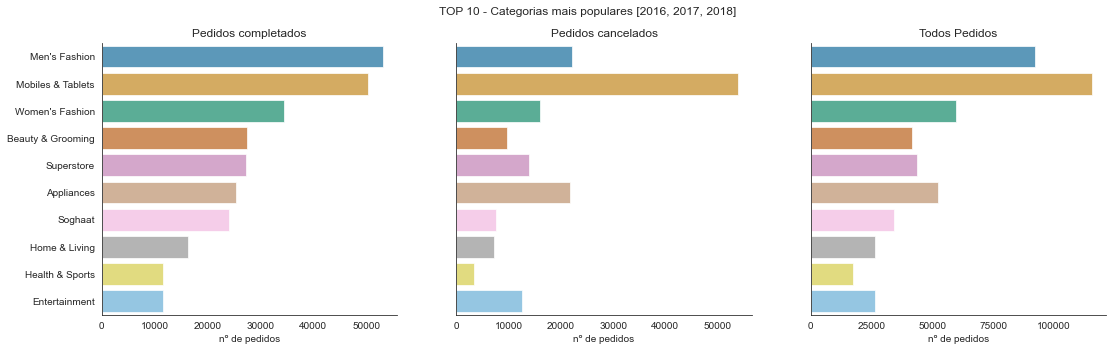

In [40]:
count_plot_kwargs =  {'alpha': 0.7,
                     'orient' : 'v',
                     'palette': 'colorblind'} 

def plot_categorias_mais_populares(lista_ano: list):
    fig, axs = plt.subplots(1,3,figsize = (18,5), sharey = True)
    
    fig.suptitle(f'TOP 10 - Categorias mais populares {lista_ano}')
    
    plot_order = df_sorted_date[(df_sorted_date.status.isin(completed)) & 
                                (df_sorted_date.year.isin(lista_ano))] \
                    .category_name \
                    .value_counts() \
                    .iloc[:10].index

    order_status = {'Pedidos completados':completed,
                    'Pedidos cancelados':incompleted,
                   'Todos Pedidos':completed + incompleted + refunded}

    for ax, kv in zip(axs, order_status.items()):
        mask = ((df_sorted_date.status.isin(kv[1])) & (df_sorted_date.year.isin(lista_ano)))
        
        sns.countplot(data = df_sorted_date[mask],
                      y = 'category_name', 
                      ax = ax, order = plot_order,
                      **count_plot_kwargs)
        
        ax.set(ylabel = '', xlabel = 'nº de pedidos', 
                title = f'{kv[0]}' )
        
    sns.set_context('notebook', font_scale = 1.3)
    sns.despine()
        
plot_categorias_mais_populares([2016, 2017, 2018])

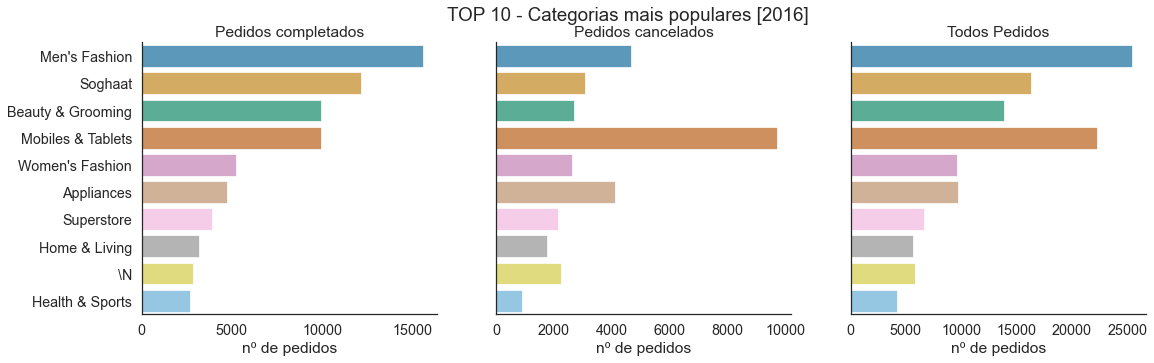

In [41]:
plot_categorias_mais_populares([2016])

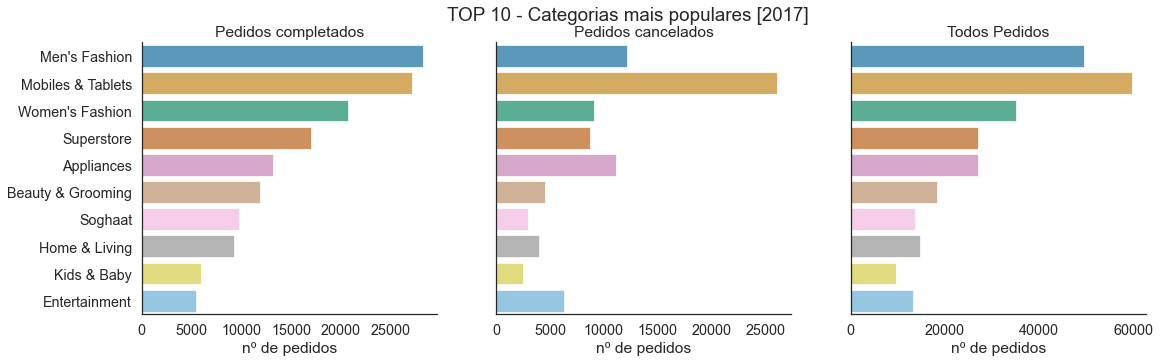

In [42]:
plot_categorias_mais_populares([2017])

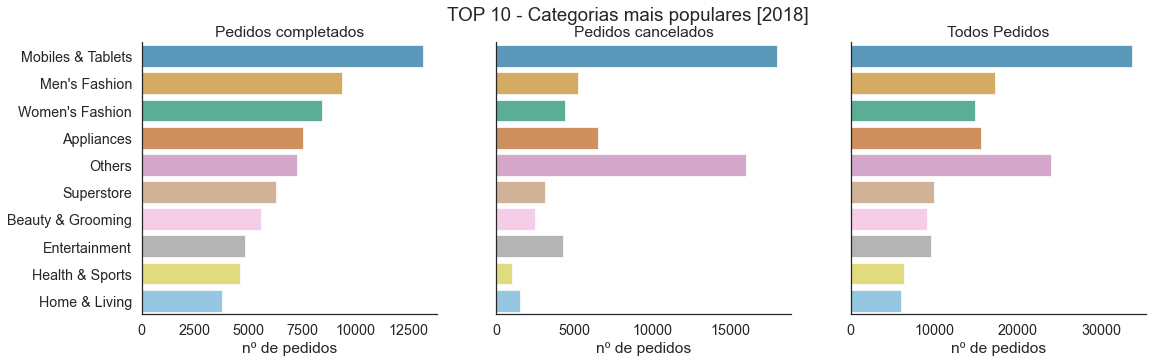

In [43]:
plot_categorias_mais_populares([2018])

Apesar de sempre estar nas categorias mais vendidas, podemos ver um **aumento expressivo na participação da categoria "Mobiles & Tablets"** em 2017 e 2018, tornando ela a mais popular do e-commerce. É sabido que marcas chinesas e indianas (como OPPO, Xiaomi, HUAWEI, Inifinix e outras) de celulares começaram a aparecer com mais força próximo do ano de 2017, principalmente no mercado internacional de e-commerces devido à categoria "*Flagship Killer*" - celulares poderosos em suas especificações, mas com preço bem abaixo dos concorrentes *famosos*. 

Além disso, dá pra perceber que essa é uma das categorias com **maior ratio pedidos cancelados/pedidos concluídos**, o que eu imagino que possa ser comum para esse tipo de produto - **itens mais caros tem menor chance de serem comprados por impulso**.
<br>

Podemos ver um crescimento BEM notável no ano de 2018 na categoria **"Others"** também (que nem aparecia no TOP 10 nos outros anos), o que, infelizmente, não nos diz muita coisa. Pelo fato dos itens terem apenas o SKU disponível, não podemos ter certeza do que a categoria se trata exatamente. **Outra categoria notável é a de roupas** ("Women's Fashion" e "Men's Fashion") **e produtos de beleza**. Apesar da queda na participação de pedidos quando comparado com os anos passados, essas categorias sempre estão no TOP 5. É válido lembrar também que não possuímos os dados de final de ano de 2018 - e essas categorias são bem comuns quando pensamos em presentes.
<br>

Agora, quero dar uma olhada mais atenta na categoria "Mobiles & Tablets". Como visto anteriormente, alguns dos SKU's dessa categoria não eram códigos ilegíveis - o que poderia nos dizer mais sobre os principais produtos vendidos nessa categoria.


In [44]:
# Definindo função helper para selecionar dados de acordo com o ano e a categoria

def data_selection(status:list, year:list, category):
    selected_data = df_sorted_date[(df_sorted_date.status.isin(completed)) & 
                               (df_sorted_date.year.isin(year)) & 
                               (df_sorted_date.category_name == category)]
    return selected_data

mobile_tablet_completed_2016 = data_selection(completed, [2016], "Mobiles & Tablets")

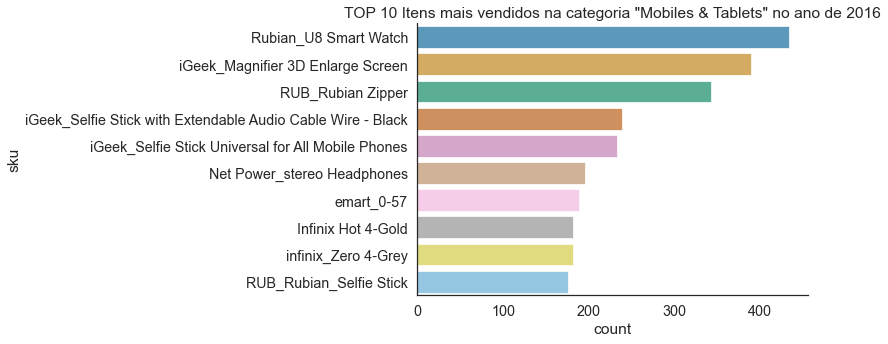

In [45]:
def plot_data_selection(selected_data, column_to_plot, top_n, title):
    fig, ax = plt.subplots(figsize = (7,5))
    
    plot_order = selected_data[column_to_plot].value_counts().iloc[:top_n].index
    ax.set_title(title)
    
    sns.countplot(data = selected_data,
                  y = column_to_plot,
                  order = plot_order,
                  **count_plot_kwargs)
    
    sns.set_context('notebook', font_scale = 1.3)
    sns.despine()
    
plot_data_selection(mobile_tablet_completed_2016, 'sku', 10,
                    'TOP 10 Itens mais vendidos na categoria "Mobiles & Tablets" no ano de 2016')

A maioria dos itens mais vendidos da categoria "Mobiles & Tablets" em 2016 são acessórios de marcas de entrada e não telefones - como smart watchs, fones de ouvido, bastões de selfie e etc. No TOP 10 mais vendidos temos apenas 2 celulares, ambos da mesma marca (Infinix). 

A partir do ano de 2017, o SKU não contém mais o nome do item - apenas o código de armazenamento interno, dificultando uma comparação como esta acima.

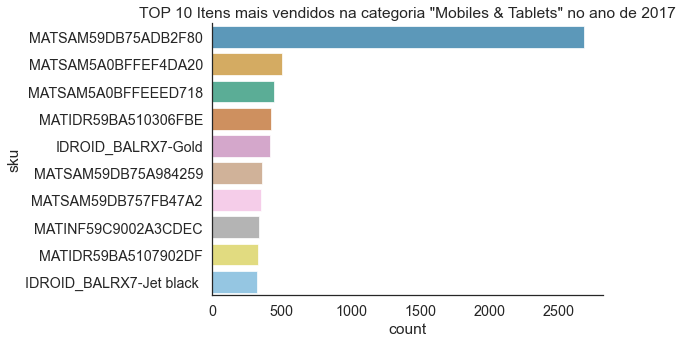

In [46]:
mobile_tablet_completed_2017 = data_selection(completed, [2017], "Mobiles & Tablets")

plot_data_selection(mobile_tablet_completed_2017, 'sku', 10,
                    'TOP 10 Itens mais vendidos na categoria "Mobiles & Tablets" no ano de 2017')

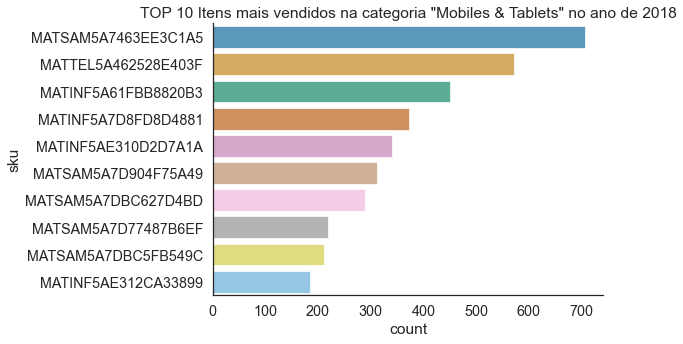

In [47]:
mobile_tablet_completed_2018 = data_selection(completed, [2018], "Mobiles & Tablets")

plot_data_selection(mobile_tablet_completed_2018, 'sku', 10,
                    'TOP 10 Itens mais vendidos na categoria "Mobiles & Tablets" no ano de 2018')

Apesar do SKU estar em formato de código na maioria dos itens, dá pra ver que após o 'MAT' inicial (que provavelmente se refere ao nome da categoria - Mobiles And Tablets), temos **3 letras que se repetem** em alguns dos códigos, como **SAM, INF, TEL e IDR**. 

Acredito que elas são relativas à marca do produto (o que poderia indicar uma mudança na forma que a categorização dos produtos é feita, colocando realmente apenas celulares e tablets nessa categoria), tendo em vista que a [Samsung e a Infinix têm grande participação no mercado de celulares de entrada asiático](https://gs.statcounter.com/vendor-market-share/mobile/pakistan). 
<br>

Ainda sobre as categorias, anteriormente eu havia suposto que a participação menor dos produtos relacionados à moda e beleza em 2018 poderia ter relação com o falta de dados do final do ano. Vamos observar agora o **desempenho mensal das principais categorias em 2017** (o único ano do dataset com todos os meses):

In [48]:
def monthly_perfomance_categories(category):
    
    selected_data =  data_selection(completed, [2017], category)

    fig, ax = plt.subplots(figsize = (7,3))

    sns.countplot(data = selected_data,
                  y = 'month',
                  orient = 'v',ax = ax,
                  order = range(1,13), alpha = 0.7,
                  palette = 'viridis' )

    sns.set_context('notebook', font_scale = 1.3)
    sns.despine()   

    # Customização axis

#     ax.locator_params(axis='x', nbins=10)
    
    y_ticks = ax.get_yticks()
    plt.yticks(y_ticks, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    
    ax.set(title = f"Número de pedidos mensais completados na categoria {category} em 2017",
          ylabel = "Mês", xlabel =' Quantidade de pedidos')

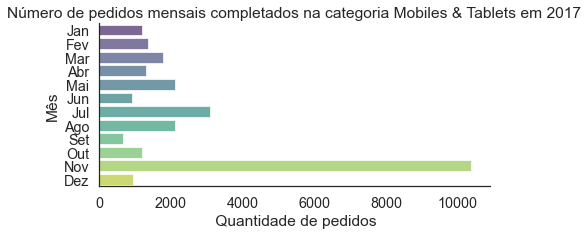

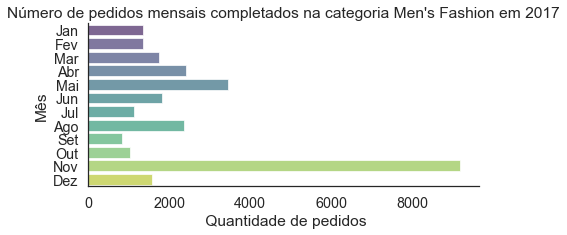

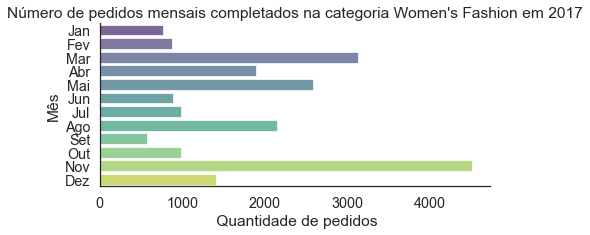

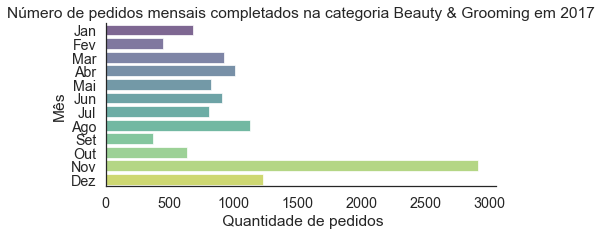

In [49]:
for category in ["Mobiles & Tablets", "Men's Fashion", "Women's Fashion", "Beauty & Grooming"]:
    monthly_perfomance_categories(category);

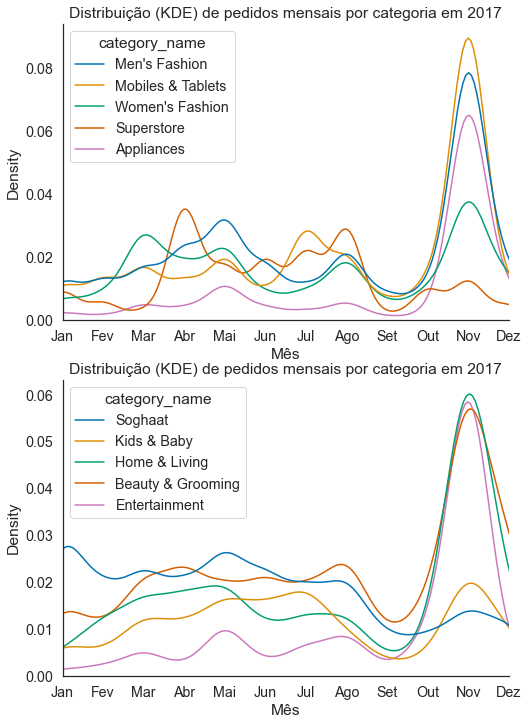

In [50]:
categories = [["Mobiles & Tablets", "Men's Fashion", "Women's Fashion", "Superstore", "Appliances"],
             ['Kids & Baby', 'Soghaat', 'Home & Living', 'Beauty & Grooming', 'Entertainment']]

fig, axs = plt.subplots(2, figsize = (8, 12))

for category, ax in zip(categories, axs):
    
    selected_data = df_sorted_date[(df_sorted_date.status.isin(completed)) & 
                               (df_sorted_date.year.isin([2017])) & 
                               (df_sorted_date.category_name.isin(category))]
    
    sns.kdeplot(data = selected_data, x = 'month',
                     hue = 'category_name',
                     alpha=0.7, palette = 'colorblind', ax = ax)

    ax.set(title = f"Distribuição (KDE) de pedidos mensais por categoria em 2017",
           xlabel = "Mês",
           xlim = [1,12],
           xticks = range(1,14))  

    ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', '']);
    

sns.set_context('notebook', font_scale = 1.3)
sns.despine()


Existe sim um **grande aumento no volume de pedidos no final do ano**. Mas a suposição de que é esse o motivo pelo qual a categoria **"Mobile & Tablets"** ultrapassou o as categorias relacionadas a moda (em específico, a **"Men's Fashion"**) não necessariamente é válida, visto que a forma que os pedidos são distribuídos nos meses entre as categorias é parecido - principalmente no final do ano.
<br>

O gráfico de distribuição de pedidos mensais separado por categoria é extremamente rico, permitindo ver o **aumento expressivo no volume de pedidos em Novembro em quase todas as categorias** - provavelmente por causa da *Black Friday* e *Cyber Monday* - e **efeitos sazonais** como o aumento nos pedidos de Women's Fashion em **Março e Maio** - possívelmente devido ao dia das mães e o dia das mulheres nesses meses. 

### Formas de Pagamento vs. Order Status

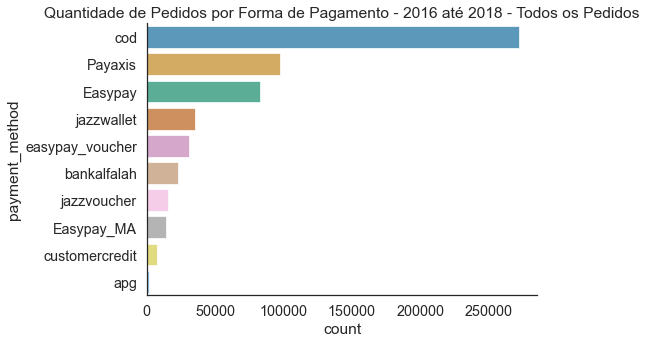

In [51]:
plot_data_selection(df_sorted_date, 'payment_method', 10, 
                    'Quantidade de Pedidos por Forma de Pagamento - 2016 até 2018 - Todos os Pedidos')

O método de pagamento mais comum no E-commerce, sendo **2,5x maior** que é o **[COD - Cash On Delivery](https://en.wikipedia.org/wiki/Cash_on_delivery)**, algo esperado para quem já conhece o mercado indiano/ do Oriente Médio. 
Essa forma de pagamento é até comum no mercado ocidental, mas normalmente se limita para pequenos comércios locais e restaurantes. 
<br>Já as plataformas de pagamento on-line, como a *EasyPay* e a *Payaxis* seguem abaixo.
<br>

Considerando que o COD necessita que o cliente pague na hora do recebimento, é possível fazer **uma suposição que esse método de pagamento possui um ratio menor de pedidos cancelados/pedidos totais**. Além disso, é sabido que **plataformas de pagamento** possuem **sistemas antifraude** (ainda que compras fraudulentas sejam uma mínima parcela das compras) e **permitem o cancelamento após o pedido ter sido feito**, devido a forma que o cartão de crédio funciona, o que iria de acordo com a hipotese.<br>

Vamos visualizar esses dados e utilizar testes de correlação para confirmar isso:

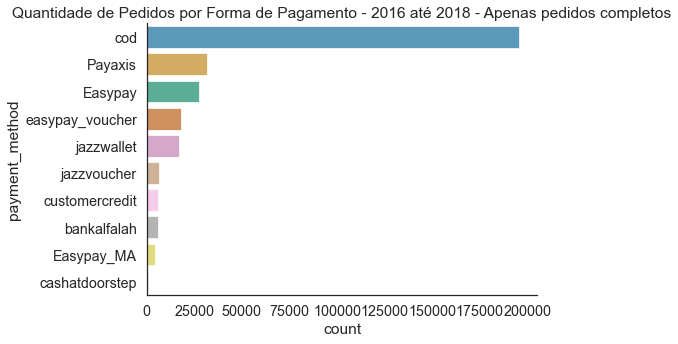

In [52]:
plot_data_selection(df_sorted_date[df_sorted_date.status.isin(completed)], 'payment_method', 10, 
                    'Quantidade de Pedidos por Forma de Pagamento - 2016 até 2018 - Apenas pedidos completos')

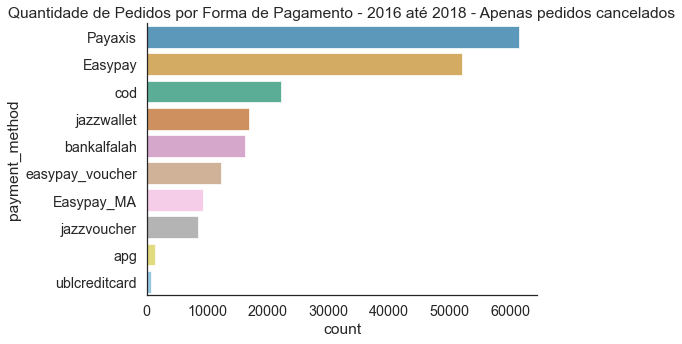

In [53]:
plot_data_selection(df_sorted_date[df_sorted_date.status.isin(incompleted)], 'payment_method', 10, 
                    'Quantidade de Pedidos por Forma de Pagamento - 2016 até 2018 - Apenas pedidos cancelados')

Mesmo antes de calcular o ratio, os **plots já dão suporte** à suposição de que **o status do pedido** está altamente **relacionado com a forma de pagamento** dele. É possível observar que mais de 60% dos pedidos feitos utilizando o Payaxis foram cancelados.

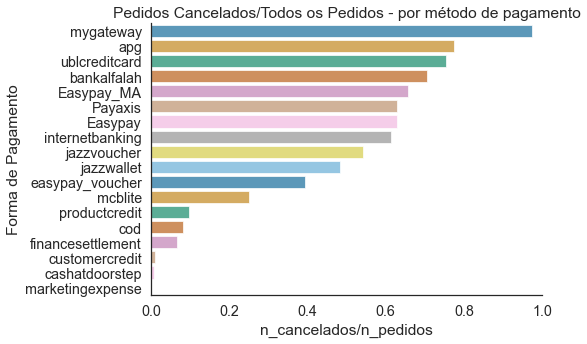

In [54]:
ser_statuscancelled_pm_ratio = (df_sorted_date[df_sorted_date.status.isin(incompleted)] \
                                ['payment_method'].value_counts() /
                                df_sorted_date['payment_method'].value_counts())

order = ser_statuscancelled_pm_ratio.sort_values(ascending = False).index
fig, ax = plt.subplots(figsize = (7,5))

sns.barplot(x = ser_statuscancelled_pm_ratio,
            y = ser_statuscancelled_pm_ratio.index,
            order = order, orient = 'h', 
            palette = 'colorblind', alpha = 0.7)
# axis
ax.set(title = "Pedidos Cancelados/Todos os Pedidos - por método de pagamento",
       ylabel = "Forma de Pagamento",
       xlabel = 'n_cancelados/n_pedidos')

ax.set_xlim(0,1)
sns.set_context('notebook', font_scale = 1.3)
sns.despine()

ax;

#### Teste Chi-Square Tables

**H(0): As variáveis "Status" do pedido e "Payment Method" são independentes.**

Caso p < 0.05, rejeitamos a hipótese nula H(0) e concluímos que as variáveis são correlacionadas.

In [55]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_sorted_date.status, df_sorted_date.payment_method)

In [56]:
_, p, dof, expected = chi2_contingency(table.values)

print(f"p-valor < 0.05: {p < 0.05}")

p-valor < 0.05: True


Considerando as visualizações e o resultado do teste chi², podemos ter certeza que a forma de pagamento do pedido e o status dele tem correlação. 

### Análise de Vendas

Os DataFrames criados anteriormente facilitarão a análise dos dados numéricos do dataset, permitindo uma análise temporal do crescimento do e-commerce paquistanês. 

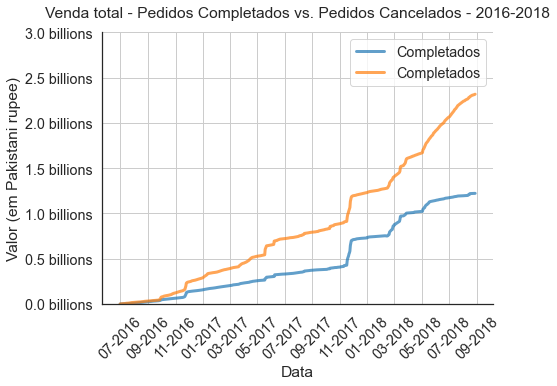

In [57]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (7,5))

ax.set_title("Venda total - Pedidos Completados vs. Pedidos Cancelados - 2016-2018", pad = 15)

for df, label in zip([total_daily_completed_orders, total_daily_incompleted_orders],
                     ['Completados', 'Cancelados']):
    
    sns.lineplot(x = df['created_at'],
                 y = df['cum_item_total']/1000000000,
                 ax = ax, label = 'Completados',
                 linewidth = 3, alpha = 0.7,
                 palette = 'colorblind')


# Customização X-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_tick_params(rotation=45)

# Customização Y-axis
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f} billions"))

ax.set(ylim = (0,3),
       ylabel = "Valor (em Pakistani rupee)",
       xlabel = "Data")

sns.set_context('notebook', font_scale = 1.3)
sns.despine()


plt.grid(True)

In [58]:
# Agurpando por mes-ano

total_completed_grouped = total_daily_completed_orders.groupby('month_year').sum().reset_index()
total_incompleted_grouped = total_daily_incompleted_orders.groupby('month_year').sum().reset_index()

# Criando coluna ratio Vdesconto/Vvenda

total_completed_grouped['discount_amount/item_total'] = (total_completed_grouped['discount_amount']/
                                                         total_completed_grouped['item_total'])

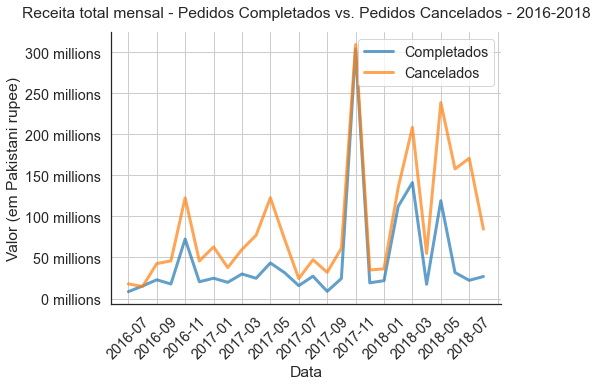

In [59]:
fig, ax = plt.subplots(figsize = (7,5))

ax.set_title("Receita total mensal - Pedidos Completados vs. Pedidos Cancelados - 2016-2018", pad = 15)

for df, label in zip([total_completed_grouped, total_incompleted_grouped],
                     ['Completados', 'Cancelados']):
    
    sns.lineplot(x = df.month_year,
                 y = df['item_total']/1000000,
                 ax = ax, label = label, alpha = 0.7,
                 linewidth = 3, palette = 'colorblind')
    
# Customização X-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_tick_params(rotation=45)

# Customização Y-axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} millions"))

ax.set(ylabel = "Valor (em Pakistani rupee)",
       xlabel = "Data")

sns.set_context('notebook', font_scale = 1.2)
sns.despine()

plt.grid(True)

O e-commerce **apresenta tendência de crescimento** quando observamos as vendas mensais dos anos disponíveis. Assim como visto anteriormente na análise das categorias, o **mês de novembro possui uma importância expressiva para o site** - sendo possível visualizar um crescimento integralmente **vertical na receita total da empresa** (principalmente em 2017, mas é possível ver que em 2016 o comportamento da curva é o mesmo - o valor que bem menor).
<br>

Analisando esses comportamentos e comparando os resultados dos meses iniciais do ano de 2017 com os do ano de 2018, dá pra **imaginar que o mês de novembro de 2018 terá um resultado ainda mais expressivo que os anos anteriores**. 
<br>

Anteriormente, eu supus que o número alto de pedidos em Novembro poderia ser advindo da Black Friday e da Cyber Monday (e seus derivados - Black Week, Black November). Na próxima visualização, removerei os pedidos cancelados e adicionarei um eixo y secundário, contendo valores da soma dos descontos dados em um mês dividido pela venda total daquele mês.

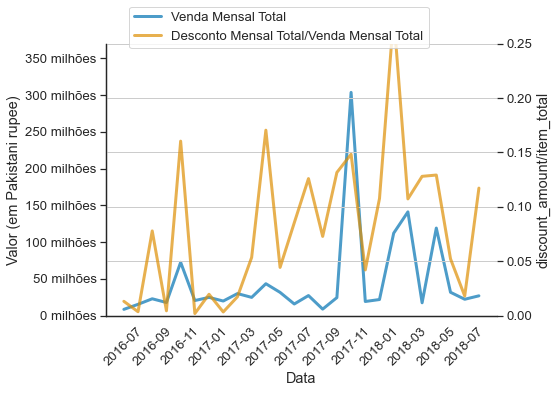

In [60]:
fig, ax = plt.subplots(figsize = (7,5))

ax2 = plt.twinx()

labels = ['Venda Mensal Total', 'Desconto Mensal Total/Venda Mensal Total']
axs = (ax, ax2)
y = (total_completed_grouped['item_total']/1000000,
     total_completed_grouped['discount_amount/item_total'])

for label, ax_, y, c in zip(labels, axs, y, sns.color_palette('colorblind')[:2]):
    
    sns.lineplot(x = total_completed_grouped.month_year,
                 y = y, ax = ax_,
                 label = label, color = c,
                 linewidth = 3, alpha = 0.7,
                 legend = False)
    
# Customização axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} milhões"))

ax.set(ylabel = "Valor (em Pakistani rupee)",
       xlabel = "Data",
       ylim = (0, 370))

ax2.set(ylim = (0, 0.25))

ax.figure.legend(loc = 'upper center')
sns.set_context('notebook', font_scale = 1.3)
sns.despine()

plt.grid(True)

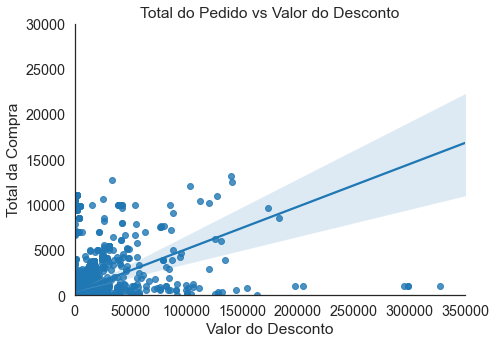

In [61]:
fig, ax = plt.subplots(figsize = (7,5))

sns.regplot(
    x = 'grand_total',
    y = 'discount_amount',
    data = df_sorted_date[(df_sorted_date.discount_amount > 0) &
                          (df_sorted_date.duplicated('increment_id', keep = 'first'))] \
                         .sample(10000, random_state = 42),    
    ax = ax
)

ax.set(title  = "Total do Pedido vs Valor do Desconto",
       ylabel = "Total da Compra",
       xlabel = "Valor do Desconto",
       xlim = (0, 350000),
       ylim = (0, 30000))

sns.set_context('notebook', font_scale = 1.3)
sns.despine()

É possível ver que **normalmente há um aumento na venda mensal quando existe um pico no ratio desconto/venda**, o que demonstra uma possível correlação entre as duas variáveis - o que é esperado por aqueles mais familiarizados com os estudos de precificação e marketing. Dá pra observar uma tendência de crescimento no valor e na frequência dos descontos também.<br> 
Vamos testar a hipótese nula de que o verdadeiro coeficiente de correlação (r) é igual a 0 e calcular o coeficiente da correlação de pearson entre as duas variáveis.
<br>

**H(0): As variáveis 'price*qty_ordered' do pedido e 'discount_amount/price_total' são independentes (r = 0).**

Caso p < 0.05, rejeitamos a hipótese nula H(0) e concluímos que as variáveis são correlacionadas.

In [62]:
from scipy.stats import pearsonr

r, p_value = pearsonr(total_completed_grouped['item_total'],
                      total_completed_grouped['discount_amount/item_total'])

print(f"p-valor < 0.05: {p < 0.05}\n")
print(f"Coeficiente r = {r}")

p-valor < 0.05: True

Coeficiente r = 0.4843122720749158


A hipótese nula foi rejeitada utilizando um CI de 95%. Podemos afirmar com confiança que as **variáveis tem uma correlação positiva e fraca-moderada**.

Agora vamos dar um zoom e observar o dentro da semana. **Qual o dia da semana que vende mais normalmente**?
Vou utilizar como estimador a mediana, uma vez que ela é mais robusta à outliers.

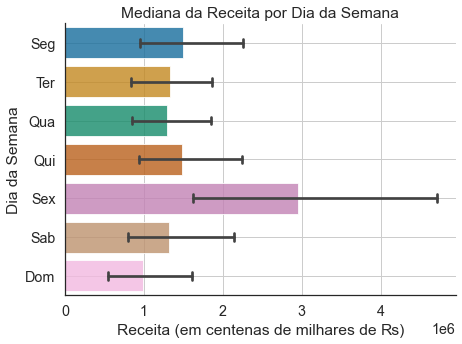

In [63]:
fig, ax = plt.subplots(figsize = (7,5))

sns.barplot(x = 'item_total', y = 'day_of_the_week',
            data = total_daily_completed_orders, estimator = np.mean,
            orient = 'h', alpha = 0.8, capsize=.2,
            palette = 'colorblind')

ax.set(xlabel = "Receita (em centenas de milhares de ₨)",
       ylabel = "Dia da Semana",
       title = "Mediana da Receita por Dia da Semana")

y_ticks = ax.get_yticks()
plt.yticks(y_ticks, ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
    
sns.set_context('notebook', font_scale = 1.3)
sns.despine()
plt.grid()

Utilizando a barra de erro, dá pra observar que temos outliers expressivos na sexta, provavelmente por causa da Black Friday. Abaixo, os 5 dias com maior receita no dataset:

In [64]:
total_daily_completed_orders.nlargest(5, columns = 'item_total')\
                            [['created_at', 'qty_ordered', 'item_total', 'day_of_the_week']]

created_at  qty_ordered  item_total  day_of_the_week
510 2017-11-24      7794.00 60361657.73                4
503 2017-11-17      8063.00 48883929.07                4
621 2018-03-15      4404.00 31528679.94                3
512 2017-11-26      2962.00 28282124.84                6
597 2018-02-19      1828.00 26425127.25                0

Em 2017, a Black Friday ocorreu no dia 24 de novembro - o primeiro lugar da lista.

### Pedido

Vamos

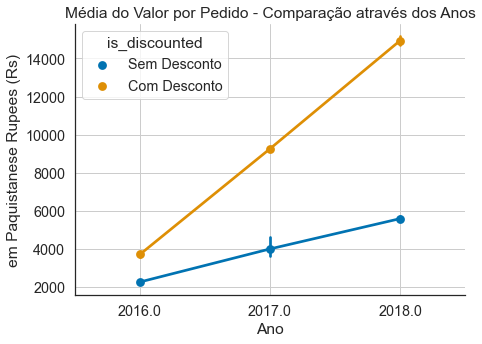

In [65]:
fig, ax = plt.subplots(figsize = (7,5))

df_grouped_pedido = df_sorted_date.groupby(['increment_id','status', 'year'])\
                                    .sum().reset_index()

df_grouped_pedido['is_discounted'] = ['Com Desconto' if x > 0 else 'Sem Desconto' for x in df_grouped_pedido.discount_amount]
df_grouped_pedido['is_completed'] = [True if x in completed else False for x in df_grouped_pedido.status]

sns.pointplot(data=df_grouped_pedido[df_grouped_pedido.is_completed],
         y='item_total', x='year', hue = 'is_discounted',
         palette = 'colorblind',
         alpha = 0.8, estimator = np.mean, ci = 90)

ax.set(title = 'Média do Valor por Pedido - Comparação através dos Anos',
      ylabel = 'em Paquistanese Rupees (Rs)',
      xlabel = 'Ano')

sns.set_context('notebook', font_scale = 1.3)
plt.grid()
sns.despine()

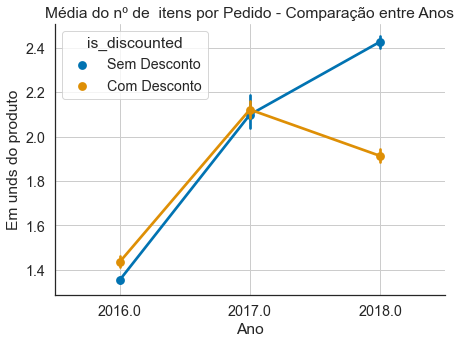

In [66]:
fig, ax = plt.subplots(figsize = (7,5))

sns.pointplot(data=df_grouped_pedido[df_grouped_pedido.is_completed],
         y='qty_ordered',
         x='year', hue = 'is_discounted',
         estimator = np.mean,
         palette = 'colorblind',
         alpha = 0.8, ci = 95)

ax.set(title = 'Média do nº de  itens por Pedido - Comparação entre Anos',
      ylabel = 'Em unds do produto',
      xlabel = 'Ano')

sns.set_context('notebook', font_scale = 1.3)
plt.grid()
sns.despine()

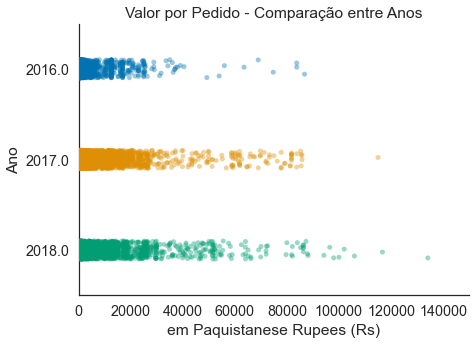

In [67]:
fig, ax = plt.subplots(figsize = (7,5))

df_grouped_pedido_sample = df_grouped_pedido.sample(20000)

sns.stripplot(data=df_grouped_pedido_sample[df_grouped_pedido_sample.is_completed],
         x='item_total',
         y='year', orient = 'h',
         palette = 'colorblind',
         alpha = 0.4)

ax.set(title = 'Valor por Pedido - Comparação entre Anos',
      xlabel = 'em Paquistanese Rupees (Rs)',
      ylabel = 'Ano',
      xlim = (0,150000))

sns.set_context('notebook', font_scale = 1.3)
sns.despine()

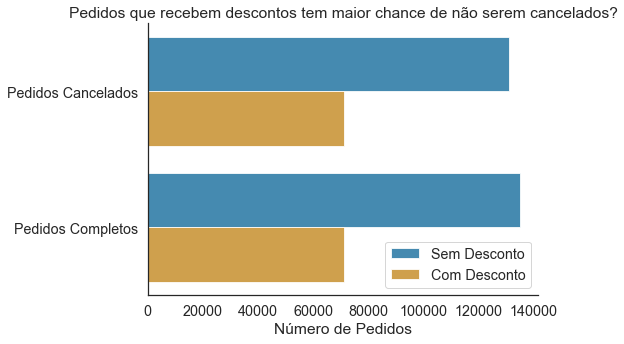

In [68]:
fig, ax = plt.subplots(figsize = (7,5))

sns.countplot(data = df_grouped_pedido,
             y = 'is_completed',
             hue = 'is_discounted', 
             palette = 'colorblind',
             alpha = 0.8, color = 'r',
             ax = ax)

ax.set(title = 'Pedidos que recebem descontos tem maior chance de não serem cancelados?',
      xlabel = 'Número de Pedidos',
      ylabel = '')

ax.set_yticklabels(["Pedidos Cancelados", "Pedidos Completos"])

ax.legend()
sns.set_context('notebook', font_scale = 1.3)
sns.despine()

## Previsões

### Prophet

Apesar do FBProphet ser mais indicado para **séries temporais com maior volume de dados e com padrões sazonais bem definidos**, acredito que, mesmo que a previsão não seja perfeita, os **plots da previsão e os componentes poderão trazer alguns insights interessantes** sobre os dados:

In [69]:
def fit_prophet(ds, y, log_growth = False):
    
    df =  pd.DataFrame({'ds':ds, 'y':y})
    
    # Adicionado feriados paquistaneses
    holidays = pd.DataFrame(['2016-08-14', '2017-08-14', '2018-08-14', '2016-11-25', '2017-11-26', '2018-11-23'])
    holidays["holiday"] = ['Independence day']*3 + ['Black Friday']*3 
    holidays = holidays.rename(columns={0:"ds"})
    
    # Fittando o modelo Growth
    if log_growth :
        tamanho_total_2017 = total_daily_completed_orders\
                    [total_daily_completed_orders.created_at == '2017-12-31']\
                    ['cum_item_total'].iloc[0]
        
        df['cap'] = tamanho_total_2017*2.3
        df['floor'] = 0
        
        m = Prophet(growth='logistic', holidays=holidays)     
    
    # Fittando o modelo
    else:
        m = Prophet(holidays=holidays)
        
    m.add_country_holidays(country_name='PK')
    m.fit(df)

    # Criando e prevendo
    future = m.make_future_dataframe(periods=125)
    
    if log_growth:
        future['cap'] = tamanho_total_2017*2.3
        future['floor'] = 0
        
    forecast = m.predict(future)
    
    return m, forecast

model_it, forecast_it = fit_prophet(ds = total_daily_completed_orders['created_at'],
                                    y = total_daily_completed_orders['item_total'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
fig = go.Figure()

fig = plot_plotly(model_it, forecast_it, xlabel = 'Data', ylabel = 'Valor Venda Diária')

fig.update_layout(
    autosize=False,
    width=700,
    height=500)

In [71]:
fig = go.Figure()

fig = plot_components_plotly(model_it, forecast_it)

fig.update_layout(
    autosize=False,
    width=700,
    height=500)

Apesar das previsões e componentes negativos, dá pra ver alguns padrões que já tinham sido observados antes - como o aumento nas vendas no mês de Março, Maio e principalmente em Novembro e a participação da Sexta-Feira na venda semanal.
<br>

O modelo prevê um aumento nas vendas em Novembro de 2018 muito parecido com o de 2017, como era esperado de um modelo fortemente ligado a sazonalidade. No entanto, é possível ver um crescimento considerável durante o primeiro semestre de 2018 quando comparado com o de 2017, o que poderia indicar um aumento ainda maior em Novembro.
<br>

Abaixo, a previsão que o FBProphet faz utilizando o crescimento cumulativo (em vendas totais). 

In [72]:
model_cit, forecast_cit = fit_prophet(ds = total_daily_completed_orders['created_at'],
                                      y = total_daily_completed_orders['cum_item_total'],
                                      log_growth = True)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
fig = go.Figure()

fig = plot_plotly(model_cit, forecast_cit, xlabel = 'Data', ylabel = 'Valor Venda Total')

fig.update_layout(
    autosize=False,
    width=700,
    height=500)

Utilizando um modelo de growth logístico com parametrização padrão e caps definido em 130% da receita acumulada de vendas do dataset até 2017 (valor definido utilizando a taxa média de crescimento dos 3 maiores e-commerces paquistaneses nos últimos 4 anos).

Assim como no primeiro modelo, foram adicionados efeitos de sazonalidade de acordo com o país (feriados nacionais, por ex.).
<br>